# 🫀 CAIRE Hackathon Starter Notebook  
### Task: Cardiac Event Detection from PPG Signals

Welcome to the **Cardiac Event Detection** challenge 🎯

This notebook corresponds to **Option 1** of the **Add-On ML Innovations** in the Hackathon Challenge.  

Your goal is to build a **Machine Learning model** that detects **arrhythmia events** from physiological signals — distinguishing between healthy and irregular cardiac rhythms.


## 📋 OVERVIEW

This notebook helps you build a machine learning model for cardiac arrhythmia detection. You'll train a classifier to distinguish between healthy and arrhythmic heart rhythms using our curated PPG dataset.

**What happens next?**  
This notebook focuses **only on the PPG training stage** — building and exporting your arrhythmia-detection model using clean, sensor-based PPG signals.  

In the next stages of the hackathon, you’ll **use this exported model** on top of **rPPG signals extracted from driver videos via the CAIRE Cloud API**, and **integrate it into your real-time dashboard** to test how well it generalizes to real-world conditions.  


## 🎯 YOUR MISSION

### Step 1: Train on PPG Data (This Notebook)
- Work with medical-grade PPG (Photoplethysmography) signals from contact sensors
- Build and train a binary classifier: Healthy vs. Arrhythmic rhythms
- Evaluate model performance on our test set
- Export your trained model for deployment

### Step 2: Deploy on rPPG Signals (Next Challenge)
- Use the CAIRE Cloud API to extract rPPG signals from driver videos
- Apply your PPG-trained model to these camera-based physiological signals
- Evaluate real-world performance and generalization

---

**Key Deliverable**: A trained model that accepts a 10-second signal segment and outputs an arrhythmia prediction.

## 🔬 UNDERSTANDING THE SIGNAL TYPES

<p align="center">
  <img src="https://drive.google.com/uc?id=1lxRC-nDFiYRfm75f8-_ce1_HTzzwqYRm" width="400">
  <br>
  <em>Figure: Comparing PPG (contact) vs rPPG (remote) signal acquisition</em>  
  <br>
  <sub>Source: Fan et al., <em>Robust blood pressure estimation using an RGB camera</em>, Journal of Ambient Intelligence and Humanized Computing, 2020.  
  DOI: <a href="https://doi.org/10.1007/s12652-018-1026-6" target="_blank">10.1007/s12652-018-1026-6</a></sub>
</p>

### PPG (Photoplethysmography) - What You're Training On
- **Source**: Contact-based sensors (e.g., fingertip pulse oximeter, wearable devices)
- **Quality**: High signal-to-noise ratio, medical-grade accuracy
- **Stability**: Minimal motion artifacts, controlled measurement conditions
- **Use Case**: Perfect for learning cardiac rhythm patterns

### rPPG (Remote Photoplethysmography) - Your Deployment Target
- **Source**: Camera-based extraction from facial video (measures subtle skin color changes)
- **Context**: Real-time driver monitoring in vehicles
- **Challenges**: Lower signal quality, environmental variations, movement during driving
- **Use Case**: Non-contact health monitoring for automotive safety

---

**Why This Matters**: PPG datasets exist for arrhythmia detection, but rPPG arrhythmia datasets don't.  
Your challenge is to bridge this gap by training on PPG and deploying on rPPG signals retrieved from our API.


## 🩺 WHAT IS AN ARRHYTHMIA?

An **arrhythmia** is any **abnormal heart rhythm** that deviates from normal cardiac function.

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1YbjXcZqcwDOsGXr-UO2alOkchKRBtoCq" alt="Normal vs Irregular Heart Rhythms" width="500">
</p>

<p align="center"><b>Figure 2.</b> Comparison of normal and irregular heart rhythms (ECG waveforms).<br>
<em>Source: Mount Elizabeth Hospitals, “Did Your Heart Skip a Beat? All about Arrhythmia” (2021)</em></p>

### Normal Rhythm (Sinus Rhythm)
- Regular, periodic heartbeats with consistent intervals  
- Predictable peak-to-peak timing

### Arrhythmic Rhythm
Irregular patterns including:
- **Premature beats** (occurring too early)  
- **Skipped beats** (missing expected pulses)  
- **Chaotic timing** (unpredictable intervals)

---

### 🔗 How It Relates to PPG and rPPG
Both **PPG** (contact) and **rPPG** (remote, camera-based) signals capture the same underlying **pulse waveform** generated by the heart’s rhythm.  
Arrhythmias appear as **irregular waveform patterns** in both — but rPPG is often noisier, making detection more challenging.

---

**Why It Matters for Driving**: Severe arrhythmias (like ventricular tachycardia or cardiac arrest patterns) can cause dizziness, fainting, or impaired motor control — making real-time detection critical for road safety.  

💡 **Bonus Challenge :**  
Some **motion artifacts or lighting changes** in rPPG can **mimic arrhythmia-like patterns** even when the heart rhythm is normal.  
Think about how you’d **detect or correct** these cases.

## 1️⃣ Importations + Dataset Setup  

This cell imports all required libraries, downloads, and extracts the PPG Arrhythmia dataset.  
After running it, a **`data`** folder will appear in your working directory 🚀


In [1]:
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
import gdown
import zipfile
import shutil
import numpy as np
from tqdm import tqdm
# --- Configuration ---
FILE_ID = "16jlBsawf1rOefEaxpSbd_dPspnrZS2nB"
ZIP_PATH = "/content/ppg_arrhythmia.zip"
DATA_PATH = "/content/data"
# ---------------------

# 1. Clean up (from previous runs)
if os.path.exists(DATA_PATH):
    print(f"🧹 Removing existing '{DATA_PATH}' folder...")
    shutil.rmtree(DATA_PATH)

# 2. Download
gdown.download(f"https://drive.google.com/uc?id={FILE_ID}", ZIP_PATH, quiet=False)

# 3. Extract
print(f"\n📂 Extracting dataset...")
try:
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall("/content/") # Extract to the parent directory
except zipfile.BadZipFile:
    print(f"❌ Error: Failed to open zip file. Download may have been corrupted.")
    # Stop execution if zip is bad
    raise

# 4. Clean up Zip
print("\n🧹 Deleting zip file...")
os.remove(ZIP_PATH)

# 5. Verify
if os.path.exists(DATA_PATH):
    print(f"\n✅ Success! Dataset is ready in the '{DATA_PATH}' folder.")

    print(f"\n📁 Contents of '{DATA_PATH}' :")
    try:
        # List only the first 5 items
        contents = os.listdir(DATA_PATH)
        print(f"  {contents[:5]} {'...' if len(contents) > 5 else ''}")
    except Exception as e:
        print(f"  Could not list contents: {e}")
else:
    print(f"❌ Error: Final directory '{DATA_PATH}' not found after extraction.")
    print("   Please check the zip file's internal structure.")

Downloading...
From (original): https://drive.google.com/uc?id=16jlBsawf1rOefEaxpSbd_dPspnrZS2nB
From (redirected): https://drive.google.com/uc?id=16jlBsawf1rOefEaxpSbd_dPspnrZS2nB&confirm=t&uuid=0db0d1d9-5a15-4bfd-b904-80ddd23d0f95
To: /content/ppg_arrhythmia.zip
100%|██████████| 353M/353M [00:17<00:00, 20.3MB/s]



📂 Extracting dataset...

🧹 Deleting zip file...

✅ Success! Dataset is ready in the '/content/data' folder.

📁 Contents of '/content/data' :
  ['test', 'README.md', 'train'] 


## 2️⃣ Dataset Overview & Exploration

📦 **Dataset Attribution & Credits**  
This dataset was **curated and reorganized** from the following public study:

> **Liu, Z., Zhou, B., Jiang, Z., Chen, X., Li, Y., Tang, M., & Miao, F.**  
> *Multiclass Arrhythmia Detection and Classification From Photoplethysmography Signals Using a Deep Convolutional Neural Network.*  
> **Journal of the American Heart Association**, 2022; **11**(7): e023555.  
> doi:[10.1161/JAHA.121.023555](https://doi.org/10.1161/JAHA.121.023555)  

### 📋 What You're Working With

You've been provided with **photoplethysmography (PPG) signals** — these are physiological time-series recordings that capture blood volume changes. Your mission: build a model that can distinguish between healthy and arrhythmic heart rhythms!

---

### 📊 DATASET SPECIFICATIONS

|                    | Training | Test   | Total  |
|--------------------|----------|--------|--------|
| **Samples**        | 35,120   | 11,707 | 46,827 |
| **Duration**       | 97.6 hrs | 32.5 hrs | 130.1 hrs |
| **Segment Length** | 10 seconds @ 100 Hz (1,000 samples) |
| **Class Distribution** | Healthy: 31.2% / Arrhythmic: 68.8% |

---

### 🗂️ Dataset Structure
```
data/
├── train/
│   ├── train_segments.npy    # Training PPG signals
│   └── train_labels.npy       # Ground truth labels
└── test/
    ├── test_segments.npy      # Test PPG signals
    └── test_labels.npy        # Test labels
```

### 🏷️ Labels
- **0** = Healthy rhythm (normal cardiac activity)
- **1** = Arrhythmic rhythm (irregular cardiac activity)

---

### Signal Characteristics
- **Sampling rate**: 100 Hz
- **Segment duration**: 10 seconds per sample
- **Data format**: NumPy arrays (.npy)
- **Samples per segment**: 1,000 values

Each sample is a **~10-second PPG segment** stored as a 1-D array. This is a **binary classification** problem — predict the label for each test segment!

---

## 🔍 Let's Inspect the Data

In [2]:
# ==================== LOAD DATASET ====================
train_segments = np.load(os.path.join(DATA_PATH, 'train', 'train_segments.npy'))
train_labels   = np.load(os.path.join(DATA_PATH, 'train', 'train_labels.npy'))
test_segments  = np.load(os.path.join(DATA_PATH, 'test', 'test_segments.npy'))
test_labels    = np.load(os.path.join(DATA_PATH, 'test', 'test_labels.npy'))

# ==================== BASIC STATISTICS ====================
n_train, n_samples = train_segments.shape
n_test = test_segments.shape[0]

print("=" * 60)
print("📊 DATASET SUMMARY")
print("=" * 60)
print(f"✅ Training samples    : {n_train:,}")
print(f"🧪 Test samples        : {n_test:,}")
print(f"📏 Samples per segment : {n_samples:,}")
print(f"💾 Data type           : {train_segments.dtype}")
print()

# ==================== CLASS DISTRIBUTION ====================
train_class_counts = np.bincount(train_labels)
test_class_counts = np.bincount(test_labels)

print("-" * 60)
print("🏷️  LABEL DISTRIBUTION")
print("-" * 60)
print("TRAINING SET:")
print(f"   Class 0 (Healthy)    : {train_class_counts[0]:,} samples ({train_class_counts[0]/n_train*100:.1f}%)")
print(f"   Class 1 (Arrhythmic) : {train_class_counts[1]:,} samples ({train_class_counts[1]/n_train*100:.1f}%)")
print()
print("TEST SET:")
print(f"   Class 0 (Healthy)    : {test_class_counts[0]:,} samples ({test_class_counts[0]/n_test*100:.1f}%)")
print(f"   Class 1 (Arrhythmic) : {test_class_counts[1]:,} samples ({test_class_counts[1]/n_test*100:.1f}%)")
print()


# ==================== TEMPORAL CHARACTERISTICS ====================
segment_duration_sec = 10.0
sampling_rate = n_samples / segment_duration_sec

train_hours = (n_train * segment_duration_sec) / 3600
test_hours = (n_test * segment_duration_sec) / 3600
total_hours = train_hours + test_hours

print("-" * 60)
print("⏱️  TEMPORAL PROPERTIES")
print("-" * 60)
print(f"   Sampling rate        : {sampling_rate:.1f} Hz")
print(f"   Segment duration     : {segment_duration_sec:.1f} seconds")
print(f"   Training data        : {train_hours:.2f} hours")
print(f"   Test data            : {test_hours:.2f} hours")
print(f"   Total recording time : {total_hours:.2f} hours")
print("=" * 60)

📊 DATASET SUMMARY
✅ Training samples    : 35,120
🧪 Test samples        : 11,707
📏 Samples per segment : 1,000
💾 Data type           : float64

------------------------------------------------------------
🏷️  LABEL DISTRIBUTION
------------------------------------------------------------
TRAINING SET:
   Class 0 (Healthy)    : 10,953 samples (31.2%)
   Class 1 (Arrhythmic) : 24,167 samples (68.8%)

TEST SET:
   Class 0 (Healthy)    : 3,651 samples (31.2%)
   Class 1 (Arrhythmic) : 8,056 samples (68.8%)

------------------------------------------------------------
⏱️  TEMPORAL PROPERTIES
------------------------------------------------------------
   Sampling rate        : 100.0 Hz
   Segment duration     : 10.0 seconds
   Training data        : 97.56 hours
   Test data            : 32.52 hours
   Total recording time : 130.07 hours


## 📈 Visualizing Sample Signals

Now let's look at what healthy vs arrhythmic PPG signals actually look like! Visual inspection helps you understand the pattern differences your model needs to learn.

**💡 Tip:** Execute this cell multiple times to see different types of arrhythmic PPG signals and observe the variety of abnormal patterns in the dataset.

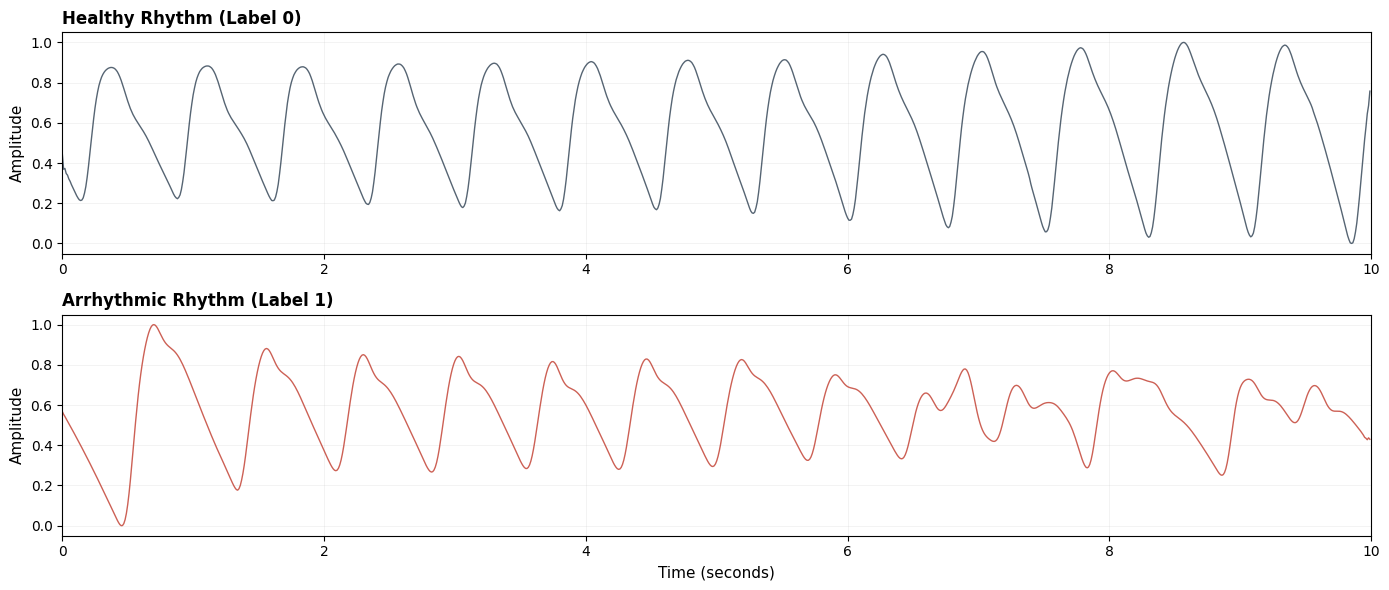

In [3]:
# ==================== SELECT SAMPLE SIGNALS ====================
idx_healthy = np.where(train_labels == 0)[0][1]  # First healthy sample
idx_arr = np.random.choice(np.where(train_labels == 1)[0])  # Random arrhythmic sample

# Calculate time axis in seconds
sampling_rate = 100  # Hz
time_axis = np.arange(n_samples) / sampling_rate

# ==================== PLOT COMPARISON ====================
fig, axes = plt.subplots(2, 1, figsize=(14, 6), facecolor='white')

# Healthy rhythm
axes[0].plot(time_axis, train_segments[idx_healthy], linewidth=1, color='#2c3e50', alpha=0.8)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Healthy Rhythm (Label 0)', fontsize=12, loc='left', fontweight='600')
axes[0].grid(True, alpha=0.2, linewidth=0.5)
axes[0].set_xlim(0, 10)

# Arrhythmic rhythm
axes[1].plot(time_axis, train_segments[idx_arr], linewidth=1, color='#c0392b', alpha=0.8)
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title('Arrhythmic Rhythm (Label 1)', fontsize=12, loc='left', fontweight='600')
axes[1].grid(True, alpha=0.2, linewidth=0.5)
axes[1].set_xlim(0, 10)

plt.tight_layout()
plt.show()

## 🔍 WHAT YOU OBSERVED

From the visualizations above:

### Healthy Rhythms Show:
- Regular, periodic peaks (consistent heartbeats)
- Predictable peak-to-peak intervals
- Smooth, rhythmic waveform patterns
- Minimal baseline variation

### Arrhythmic Signals Display:
- Irregular patterns with inconsistent timing
- Chaotic timing that deviates from normal cardiac function
- Variable peak amplitudes

These visual differences are what your model will learn to detect!

# 🎯 Next Steps: Build Your Model

Your task: preprocess the data, train a classifier, evaluate it, and prepare it for deployment via CAIRE API/dashboard.

**Steps to follow:**
1. **Preprocessing:** normalize, augment if needed.  
2. **Training:** implement with proper validation.  
3. **Evaluation:** report accuracy, precision, recall, F1-score, confusion matrix.  
4. **Export:** save model in deployable format.  

**Things to consider:**
- **Class imbalance:** dataset is 31% healthy / 69% arrhythmic → consider class weights, SMOTE, or focal loss.  
- **Real-time compatibility:** must process 10-second segments efficiently.  
- **Generalization:** model will be tested on rPPG signals (domain shift).  
- **Safety-critical metrics:** decide which evaluation metric matters most.  

**✅ Success Criteria:**  
✓ Accurate on test set  
✓ Real-time ready  
✓ Exportable  
✓ Robust to class imbalance  
✓ Generalizable to new domains (rPPG)

# 🏁 Start Coding
Implement preprocessing, training, and evaluation in the cells below.


In [4]:
!pip install numpy
!pip install  pandas
!pip install  scikit-learn
!pip install  tqdm
!pip install  matplotlib
!pip install  scipy

In [5]:
!pip install matplotlib
!pip install seaborn

In [6]:
!pip install tensorflow
!pip install keras


In [7]:
# ==================== Comprehensive Temporal Signal Processing & Model Comparison ====================
"""
This code implements:
1. Proper preprocessing: signal cleaning + standardization
2. Multiple model architectures comparison:
   - LSTM (baseline)

3. Fair evaluation and comparison

Choose the best model for your task!
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from scipy import signal
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


# ==================== 1. Advanced Signal Preprocessing ====================
print("=" * 60)
print("🔧 Advanced Signal Preprocessing Pipeline")
print("=" * 60)

class SignalPreprocessor:
    """
    Advanced preprocessing for PPG signals
    Includes: filtering, detrending, normalization, artifact removal
    """

    def __init__(self, sampling_rate=100):
        self.sampling_rate = sampling_rate
        self.scaler = None

    def bandpass_filter(self, signal_data, lowcut=0.5, highcut=8.0, order=4):
        """
        Apply Butterworth bandpass filter

        Args:
            signal_data: Input signal (can be single or batch)
            lowcut: Low cutoff frequency (Hz)
            highcut: High cutoff frequency (Hz)
            order: Filter order
        """
        nyquist = 0.5 * self.sampling_rate
        low = lowcut / nyquist
        high = highcut / nyquist

        b, a = butter(order, [low, high], btype='band')

        # Handle both single signal and batch
        if len(signal_data.shape) == 1:
            return filtfilt(b, a, signal_data)
        else:
            filtered = np.zeros_like(signal_data)
            for i in range(len(signal_data)):
                filtered[i] = filtfilt(b, a, signal_data[i])
            return filtered

    def remove_baseline_wander(self, signal_data):
        """
        Remove baseline wander using polynomial detrending
        """
        if len(signal_data.shape) == 1:
            x = np.arange(len(signal_data))
            coeffs = np.polyfit(x, signal_data, deg=3)
            baseline = np.polyval(coeffs, x)
            return signal_data - baseline
        else:
            detrended = np.zeros_like(signal_data)
            for i in range(len(signal_data)):
                x = np.arange(len(signal_data[i]))
                coeffs = np.polyfit(x, signal_data[i], deg=3)
                baseline = np.polyval(coeffs, x)
                detrended[i] = signal_data[i] - baseline
            return detrended

    def remove_outliers(self, signal_data, threshold=3.0):
        """
        Remove extreme outliers using Z-score method
        """
        if len(signal_data.shape) == 1:
            mean = np.mean(signal_data)
            std = np.std(signal_data)
            z_scores = np.abs((signal_data - mean) / std)
            signal_data[z_scores > threshold] = mean
            return signal_data
        else:
            cleaned = signal_data.copy()
            for i in range(len(signal_data)):
                mean = np.mean(signal_data[i])
                std = np.std(signal_data[i])
                z_scores = np.abs((signal_data[i] - mean) / std)
                cleaned[i][z_scores > threshold] = mean
            return cleaned

    def normalize_signal(self, signal_data, method='zscore'):
        """
        Normalize signal

        Args:
            method: 'zscore' (0 mean, 1 std) or 'minmax' (0-1 range) or 'robust' (median-based)
        """
        if method == 'zscore':
            # Z-score normalization (per signal)
            if len(signal_data.shape) == 1:
                return (signal_data - np.mean(signal_data)) / (np.std(signal_data) + 1e-8)
            else:
                normalized = np.zeros_like(signal_data)
                for i in range(len(signal_data)):
                    mean = np.mean(signal_data[i])
                    std = np.std(signal_data[i]) + 1e-8
                    normalized[i] = (signal_data[i] - mean) / std
                return normalized

        elif method == 'minmax':
            # Min-max normalization to [0, 1]
            if len(signal_data.shape) == 1:
                min_val = np.min(signal_data)
                max_val = np.max(signal_data)
                return (signal_data - min_val) / (max_val - min_val + 1e-8)
            else:
                normalized = np.zeros_like(signal_data)
                for i in range(len(signal_data)):
                    min_val = np.min(signal_data[i])
                    max_val = np.max(signal_data[i])
                    normalized[i] = (signal_data[i] - min_val) / (max_val - min_val + 1e-8)
                return normalized

        elif method == 'robust':
            # Robust normalization using median and IQR (better for outliers)
            if len(signal_data.shape) == 1:
                median = np.median(signal_data)
                q75, q25 = np.percentile(signal_data, [75, 25])
                iqr = q75 - q25
                return (signal_data - median) / (iqr + 1e-8)
            else:
                normalized = np.zeros_like(signal_data)
                for i in range(len(signal_data)):
                    median = np.median(signal_data[i])
                    q75, q25 = np.percentile(signal_data[i], [75, 25])
                    iqr = q75 - q25
                    normalized[i] = (signal_data[i] - median) / (iqr + 1e-8)
                return normalized

    def preprocess_pipeline(self, signal_data, normalize_method='zscore'):
        """
        Complete preprocessing pipeline

        Steps:
        1. Bandpass filter (remove noise)
        2. Remove baseline wander
        3. Remove outliers
        4. Normalize
        """
        print("  → Applying bandpass filter...")
        filtered = self.bandpass_filter(signal_data)

        print("  → Removing baseline wander...")
        detrended = self.remove_baseline_wander(filtered)

        print("  → Removing outliers...")
        cleaned = self.remove_outliers(detrended)

        print("  → Normalizing signals...")
        normalized = self.normalize_signal(cleaned, method=normalize_method)

        return normalized


# Apply preprocessing to training and test data
preprocessor = SignalPreprocessor(sampling_rate=100)

print("\n📊 Preprocessing Training Set...")
X_train_processed = preprocessor.preprocess_pipeline(train_segments, normalize_method='zscore')

print("\n📊 Preprocessing Test Set...")
X_test_processed = preprocessor.preprocess_pipeline(test_segments, normalize_method='zscore')

# Reshape for models: (samples, timesteps, features)
X_train_processed = X_train_processed.reshape(-1, 1000, 1)
X_test_processed = X_test_processed.reshape(-1, 1000, 1)

print(f"\n✅ Preprocessing complete!")
print(f"   Train shape: {X_train_processed.shape}")
print(f"   Test shape:  {X_test_processed.shape}")

🔧 Advanced Signal Preprocessing Pipeline

📊 Preprocessing Training Set...
  → Applying bandpass filter...
  → Removing baseline wander...
  → Removing outliers...
  → Normalizing signals...

📊 Preprocessing Test Set...
  → Applying bandpass filter...
  → Removing baseline wander...
  → Removing outliers...
  → Normalizing signals...

✅ Preprocessing complete!
   Train shape: (35120, 1000, 1)
   Test shape:  (11707, 1000, 1)



📈 Visualization of preprocessing effect:


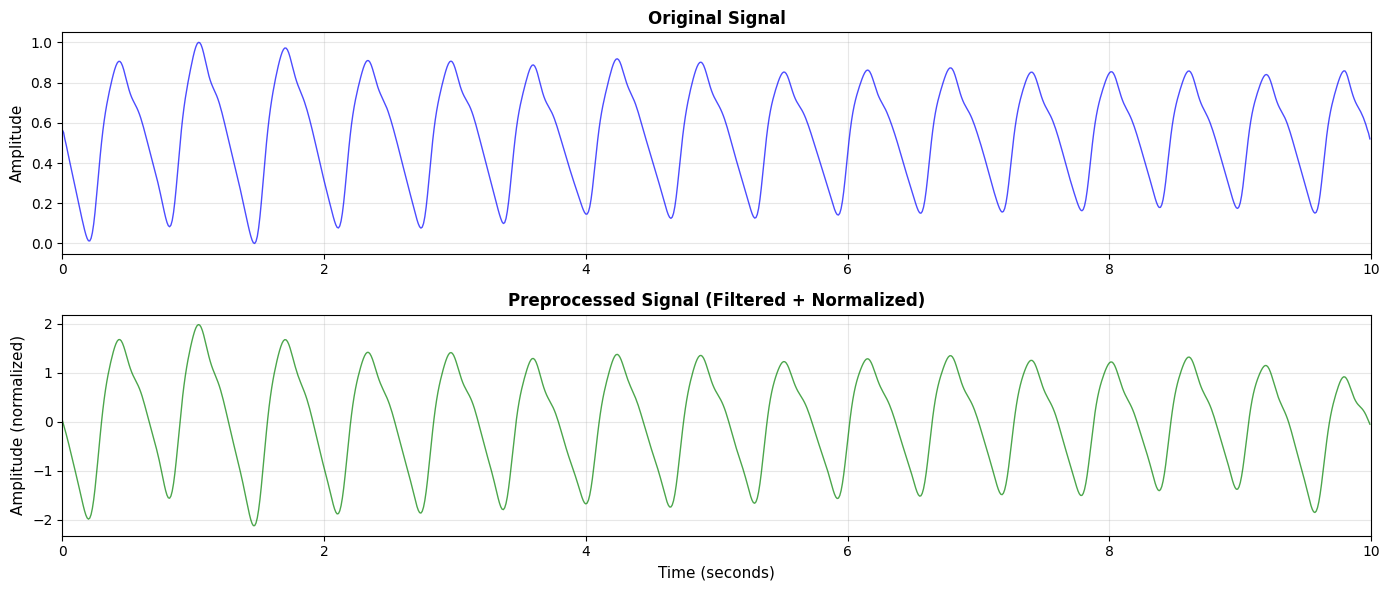

In [8]:
# Visualize preprocessing effect
def visualize_preprocessing(original, processed, sample_idx=0):
    """Visualize before/after preprocessing"""
    fig, axes = plt.subplots(2, 1, figsize=(14, 6))

    time_axis = np.arange(1000) / 100  # Convert to seconds

    # Original
    axes[0].plot(time_axis, original[sample_idx], linewidth=1, color='blue', alpha=0.7)
    axes[0].set_ylabel('Amplitude', fontsize=11)
    axes[0].set_title('Original Signal', fontsize=12, fontweight='600')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(0, 10)

    # Processed
    axes[1].plot(time_axis, processed[sample_idx].flatten(), linewidth=1, color='green', alpha=0.7)
    axes[1].set_xlabel('Time (seconds)', fontsize=11)
    axes[1].set_ylabel('Amplitude (normalized)', fontsize=11)
    axes[1].set_title('Preprocessed Signal (Filtered + Normalized)', fontsize=12, fontweight='600')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 10)

    plt.tight_layout()
    plt.show()

# Show example
print("\n📈 Visualization of preprocessing effect:")
visualize_preprocessing(train_segments, X_train_processed, sample_idx=0)




In [9]:
# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_processed, train_labels,
    test_size=0.15, random_state=42, stratify=train_labels
)

print(f"\n📦 Data split:")
print(f"   Training:   {X_train_split.shape}")
print(f"   Validation: {X_val_split.shape}")
print(f"   Test:       {X_test_processed.shape}")



📦 Data split:
   Training:   (29852, 1000, 1)
   Validation: (5268, 1000, 1)
   Test:       (11707, 1000, 1)


In [10]:
# ==================== 2. Model Architectures ====================
print("\n" + "=" * 60)
print("🏗️ Building Model Architectures")
print("=" * 60)

def build_cnn_lstm_model(input_shape=(1000, 1), dropout=0.3):
    """
    CNN-LSTM Hybrid model
    Good for: Extracting local features (CNN) + temporal patterns (LSTM)
    Better than LSTM for: Signals with both local patterns and temporal structure
    """
    model = models.Sequential([
        layers.Input(shape=input_shape),

        # CNN layers for feature extraction
        layers.Conv1D(64, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(dropout),

        layers.Conv1D(128, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(dropout),

        # LSTM layers for temporal modeling
        layers.LSTM(64, return_sequences=True),
        layers.Dropout(dropout),

        layers.LSTM(32, return_sequences=False),
        layers.Dropout(dropout),

        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout),

        layers.Dense(1, activation='sigmoid')
    ], name='CNN_LSTM_Model')

    return model


def build_transformer_model(input_shape=(1000, 1), dropout=0.3):
    """
    Transformer model with multi-head attention
    Good for: Long-range dependencies, parallel processing
    Better than LSTM for: Capturing global patterns, interpretability
    More complex: Requires more data and tuning
    """
    inputs = layers.Input(shape=input_shape)

    # Positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    position_embedding = layers.Embedding(input_dim=input_shape[0], output_dim=64)(positions)

    # Project input to higher dimension
    x = layers.Dense(64)(inputs)
    x = x + position_embedding

    # Transformer blocks
    def transformer_block(x, num_heads=4, ff_dim=128):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=64,
            dropout=dropout
        )(x, x)
        attn_output = layers.Dropout(dropout)(attn_output)
        x1 = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)

        # Feed-forward network
        ff_output = layers.Dense(ff_dim, activation='relu')(x1)
        ff_output = layers.Dropout(dropout)(ff_output)
        ff_output = layers.Dense(64)(ff_output)
        ff_output = layers.Dropout(dropout)(ff_output)
        x2 = layers.LayerNormalization(epsilon=1e-6)(x1 + ff_output)

        return x2

    # Stack transformer blocks
    x = transformer_block(x)
    x = transformer_block(x)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Classification head
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='Transformer_Model')
    return model




🏗️ Building Model Architectures


In [11]:
print("\n" + "=" * 60)
print("🏗️ Building LSTM Model Architecture")
print("=" * 60)

def build_lstm_model(input_shape=(1000, 1), dropout=0.3):
    """
    Standard LSTM model
    Good for: Sequential dependencies, long-term patterns
    """
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.LSTM(128, return_sequences=True),
        layers.Dropout(dropout),
        layers.BatchNormalization(),

        layers.LSTM(64, return_sequences=False),
        layers.Dropout(dropout),
        layers.BatchNormalization(),

        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout),

        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout),

        layers.Dense(1, activation='sigmoid')
    ], name='LSTM_Model')

    return model

# ==================== 3. Training Configuration ====================
print("\n" + "=" * 60)
print("⚙️ Training Configuration")
print("=" * 60)

# Common training parameters
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.0001

# Calculate class weights
unique, counts = np.unique(train_labels, return_counts=True)
class_weight = {0: len(train_labels) / (2 * counts[0]),
                1: len(train_labels) / (2 * counts[1])}

print(f"Class weights: {class_weight}")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {LEARNING_RATE}")


def compile_model(model):
    """Compile model with common settings"""
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc')
        ]
    )
    return model


def get_callbacks(model_name):
    """Get training callbacks"""
    return [
        ModelCheckpoint(
            f'best_{model_name}.keras',
            monitor='val_auc',
            save_best_only=True,
            mode='max',
            verbose=0
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=0
        )
    ]


# ==================== 4. Train LSTM Model ====================
print("\n" + "=" * 60)
print("🚀 Training LSTM Model")
print("=" * 60)

# Dictionary to store results
results = {}
model_name = 'LSTM'

# Build and compile model
model = build_lstm_model(input_shape=(1000, 1), dropout=0.3)
model = compile_model(model)

print(f"\nModel: {model_name}")
print(f"Total parameters: {model.count_params():,}")

# Train model
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    callbacks=get_callbacks(model_name),
    verbose=1
)

# Load best model
best_model = keras.models.load_model(f'best_{model_name}.keras')

# Evaluate on test set
test_loss, test_acc, test_prec, test_rec, test_auc = best_model.evaluate(
    X_test_processed, test_labels, verbose=0
)

# Get predictions
y_pred_proba = best_model.predict(X_test_processed, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate F1 score
test_f1 = f1_score(test_labels, y_pred)

# Store results
results[model_name] = {
    'history': history.history,
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'test_precision': test_prec,
    'test_recall': test_rec,
    'test_f1': test_f1,
    'test_auc': test_auc,
    'y_pred': y_pred,
    'y_pred_proba': y_pred_proba,
    'parameters': model.count_params(),
    'training_time': len(history.history['loss'])  # epochs until convergence
}

print(f"\n{model_name} Test Results:")
print(f"  Accuracy:  {test_acc:.4f}")
print(f"  Precision: {test_prec:.4f}")
print(f"  Recall:    {test_rec:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  AUC:       {test_auc:.4f}")


🏗️ Building LSTM Model Architecture

⚙️ Training Configuration
Class weights: {0: np.float64(1.6032137313977906), 1: np.float64(0.7266106674390698)}
Epochs: 50
Batch size: 64
Learning rate: 0.0001

🚀 Training LSTM Model

Model: LSTM
Total parameters: 123,009
Epoch 1/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.4883 - auc: 0.5136 - loss: 0.7774 - precision: 0.6955 - recall: 0.4511 - val_accuracy: 0.5869 - val_auc: 0.6003 - val_loss: 0.6732 - val_precision: 0.7501 - val_recall: 0.5994 - learning_rate: 1.0000e-04
Epoch 2/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.5361 - auc: 0.5652 - loss: 0.7001 - precision: 0.7320 - recall: 0.5196 - val_accuracy: 0.6129 - val_auc: 0.6833 - val_loss: 0.6331 - val_precision: 0.8147 - val_recall: 0.5663 - learning_rate: 1.0000e-04
Epoch 3/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.5952 - auc: 0.6550 - loss: 0.6509 - precision: 0.7921 - recall: 0.5595 - val_accuracy: 0.6120 - val_auc: 0.7380 - val_loss: 0.58

NameError: name 'f1_score' is not defined

In [ ]:
# ==================== 6. Visualization ====================
print("\n" + "=" * 60)
print("📈 Generating Visualizations")
print("=" * 60)

# Plot 2: Training History
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for model_name in results.keys():
    history = results[model_name]['history']

    # Loss
    axes[0, 0].plot(history['loss'], label=f'{model_name} Train', linewidth=2, alpha=0.7, linestyle='--')
    axes[0, 0].plot(history['val_loss'], label=f'{model_name} Val', linewidth=2)

    # Accuracy
    axes[0, 1].plot(history['accuracy'], label=f'{model_name} Train', linewidth=2, alpha=0.7, linestyle='--')
    axes[0, 1].plot(history['val_accuracy'], label=f'{model_name} Val', linewidth=2)

    # AUC
    axes[1, 0].plot(history['auc'], label=f'{model_name} Train', linewidth=2, alpha=0.7, linestyle='--')
    axes[1, 0].plot(history['val_auc'], label=f'{model_name} Val', linewidth=2)

    # Precision vs Recall
    axes[1, 1].plot(history['val_precision'], history['val_recall'],
                    marker='o', label=model_name, linewidth=2)

axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Loss Over Training')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Accuracy Over Training')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].set_title('AUC Over Training')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_xlabel('Precision')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Validation Precision-Recall Trade-off')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ==================== 7. Detailed Analysis of LSTM Model ====================
print("\n" + "=" * 60)
print(f"🔍 Detailed Analysis: {best_model_name}")
print("=" * 60)

# Confusion matrix
y_pred_best = results[best_model_name]['y_pred']
cm = confusion_matrix(test_labels, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Healthy', 'Arrhythmic'],
            yticklabels=['Healthy', 'Arrhythmic'])
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('True', fontsize=11)
axes[0].set_title(f'{best_model_name} - Confusion Matrix', fontsize=12, fontweight='600')

# ROC curve
y_pred_proba_best = results[best_model_name]['y_pred_proba']
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_proba_best)
auc_best = results[best_model_name]['test_auc']

axes[1].plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC={auc_best:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title(f'{best_model_name} - ROC Curve', fontsize=12, fontweight='600')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Classification report
print(f"\n{best_model_name} Classification Report:")
print("-" * 60)
print(classification_report(test_labels, y_pred_best,
                            target_names=['Healthy', 'Arrhythmic']))


# ==================== 8. Summary & Recommendations ====================
print("\n" + "=" * 60)
print("💡 Summary & Recommendations")
print("=" * 60)

print(f"""
LSTM Model Results:
--------------------
- Test AUC: {results[best_model_name]['test_auc']:.4f}
- Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}
- Test F1-Score: {results[best_model_name]['test_f1']:.4f}
- Test Precision: {results[best_model_name]['test_precision']:.4f}
- Test Recall: {results[best_model_name]['test_recall']:.4f}
- Parameters: {results[best_model_name]['parameters']:,}
- Epochs to Converge: {results[best_model_name]['training_time']}

Next Steps:
----------
✓ Test this model on rPPG signals (domain adaptation)
✓ Implement post-processing smoothing
✓ Add confidence thresholds for safety-critical decisions
""")

print("=" * 60)
print("✅ LSTM Model Training Finished!")
print("=" * 60)

## 🔗 NEXT PHASE: FROM PPG ➜ rPPG (CAIRE Cloud Integration)

Now that you’ve trained your model on clean **PPG signals**, it’s time to test how well it generalizes to **real-world driver videos**.

In the next phase, you’ll:

1. **Access the CAIRE Cloud API** to extract **rPPG signals** (remote PPG) from driver videos.  
2. **Preprocess the rPPG data** to match your training setup (e.g., 10-second segments @ 100 Hz).  
3. **Apply your trained model** to these signals and evaluate its ability to detect arrhythmia in natural driving conditions.  
4. **Integrate predictions into your dashboard**, visualizing health alerts in real time.  
5. **Reflect on domain adaptation** — how well does a model trained on contact-based data handle noisy, camera-based signals?
